In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, Adadelta, RMSprop

# Loading the image Dataset

In [2]:

fldr = "C:\\Users\\HP\\Desktop\\UTKFace"

In [3]:
import os
flies = os.listdir(fldr)

In [4]:
ages = []
genders = []
images = []
for fle in flies:
        age = int(fle.split('_')[0])                #split the file name into list using '_' and converting them to integers
        gender = int(fle.split('_')[1])
        total = fldr + '/' + fle
        print(total)
        image = cv2.imread(total)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(48,48))              # 48,48 is pixels size ie 48x48
        images.append(image)
        

C:\Users\HP\Desktop\UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/105_0_0_20170112213001988.jpg.chip

C:\Users\HP\Desktop\UTKFace/10_1_0_20170109203905538.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109203917216.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109203924076.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204148144.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204244904.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204255055.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204259563.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204338404.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204422889.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204435809.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204502951.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204617417.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204746535.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204844109.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/10_1_0_20170109204859493.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/12_0_0_20170110215606404.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110215739155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110220108459.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110221819113.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110224603045.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110224804208.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110224833703.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110224843637.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225028524.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225257257.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225330874.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225348936.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225540554.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110225553717.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/12_0_0_20170110232735095.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/13_0_0_20170104012310089.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170104012320089.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170104012531409.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170104013342923.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110220242419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110220458081.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224337867.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224531616.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224625011.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224745977.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224751365.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110224801290.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110225045970.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110225059227.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/13_0_0_20170110225302179.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/14_0_3_20170104225245755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170104225533201.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170104225721488.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170104225858160.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170104230143521.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170109131758363.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_3_20170117181642515.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103200528094.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103200608359.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103200837103.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103201105568.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103201644927.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170103205138666.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170113145202254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/14_0_4_20170117192737955.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232640357.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232646170.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232655904.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232717464.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232721987.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232730918.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170110232807958.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201123807.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201240276.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201246071.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201248395.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201250292.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201252122.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201253769.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_0_0_20170116201332456.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/15_1_4_20170103234910356.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_1_4_20170104005807401.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_1_4_20170104005847968.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/15_1_4_20170109212947695.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170102234641453.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170103201044224.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104003740977.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104003750790.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104012305505.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104012325066.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104012330536.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104012457770.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170104230001113.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170110224435349.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_0_0_20170110225310813.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/16_1_0_20170102234708483.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170102234728107.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170102234805899.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170102234927276.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170103163010615.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170103201016775.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170103201213287.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170103201347823.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170103201602647.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104011815680.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104012333393.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104012420681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104013358122.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104013530988.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/16_1_0_20170104013543170.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/17_0_0_20170110231820806.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110231830374.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232017297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232022621.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232027271.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232044494.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232257182.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232438939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170110232616400.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170113132359393.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170114025913647.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170114025941650.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170116182812470.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170116201003399.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_0_0_20170116205532920.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/17_1_4_20170103233548115.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_1_4_20170103234135204.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_1_4_20170103234147843.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_1_4_20170104001810179.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_1_4_20170104011834409.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/17_1_4_20170117193142374.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170103201308008.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170103201519511.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170105183259439.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110223927225.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110231228322.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110231524976.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110231625906.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110231644037.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_0_0_20170110231703804.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213624244.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213856511.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213904824.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213911368.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213919463.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213922168.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213931089.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213933756.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213935367.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213938695.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109213945602.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109214004496.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109214042490.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109214044181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/18_1_0_20170109214106546.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/19_0_0_20170103201406775.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170103201556447.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170105184049223.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170110232102606.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170113132641873.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170114030748851.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170116212106328.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170116220704294.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170117140550401.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170117140603777.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170117140608208.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170117185159337.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170119150054894.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_0_20170120133526566.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/19_0_1_20170110231826530.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/1_0_0_20161219205230805.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219205817093.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219210307125.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219211413621.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219211607517.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219212409141.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219212453942.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219212921070.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219222101551.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161219225850912.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161220201355210.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161220220135250.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161220220239129.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20161220223221043.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_0_20170103210032258.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_0_2_20161219141817185.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219141824081.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219141908313.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219141912009.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219141927321.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142002631.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142006881.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142032650.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142039985.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142124569.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142135209.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142306002.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142409225.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219142452152.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219151026723.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_0_2_20161219200342123.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219200427051.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219200503284.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219200532811.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201312292.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201319628.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201331164.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201403764.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201442357.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219201523620.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219202542596.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219202752764.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219202906108.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219202914180.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_2_20161219203016316.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224513831.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224544080.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224546584.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224645904.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224655512.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224706847.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224709226.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224713216.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224748008.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224843048.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224914784.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224917304.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224939056.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224941016.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_3_20161219224942305.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192548675.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192552629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192554517.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192555965.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192558436.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192601052.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192604164.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221192855037.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193016140.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193041157.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193434166.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193446478.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193531198.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193604223.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_0_4_20161221193606310.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191129918.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191140082.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191142050.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191148861.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191156705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191212799.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191225850.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191226882.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191232555.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191234378.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191253730.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191345833.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191347386.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191415528.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_0_20170109191436874.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_1_2_20161219161814470.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162021366.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162024742.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162113982.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162225422.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162243182.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162415934.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162419463.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162523262.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162635831.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162730478.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219162843079.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219190719971.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219190745330.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_2_20161219192240930.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143202710.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143204424.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143207700.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143211359.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143213583.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143219502.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143222430.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143234887.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143239294.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143241765.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143303110.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143313302.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143335948.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143345775.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/1_1_3_20161220143348598.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/20_0_0_20170110231653536.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170110232156775.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170113132332102.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170113132609281.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170113133053319.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170113180905699.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170113184350758.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116200755014.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116201258328.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116201311689.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116205028194.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116205342932.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116205352042.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116205525001.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_0_0_20170116205821909.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/20_1_0_20170117141304848.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117141338600.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117141358391.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117141400913.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117150259426.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117171624989.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117183640921.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117192327053.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117192922563.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117192932485.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117193547491.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117193612788.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170117193616027.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170119153358328.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_0_20170119153405080.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/20_1_4_20170105183316775.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_4_20170117192614487.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_4_20170117193602482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/20_1_4_20170117193608005.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170102233225196.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170103223223127.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170103234805676.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104020830476.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104230014969.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104230057120.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104230059401.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104230101545.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170104230103695.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170110232137372.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_0_0_20170113182733390.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/21_1_0_20170112233608086.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170112233610183.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170114032157249.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116205856338.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116214341701.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116214441148.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116214444473.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116215450607.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116215627769.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116215708125.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116220220347.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116220224031.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116220441404.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170116234657499.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_0_20170117141734034.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222105822.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222108390.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222111271.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222114302.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222116782.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222118687.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222120446.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222121713.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222522503.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222653479.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104222758121.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104223626119.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104231324474.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104231602346.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/21_1_3_20170104231611130.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/22_0_1_20170113133555880.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113133604687.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113150439151.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113150441654.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113150443999.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113155002433.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113193211629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113195509981.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170113195511076.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114030000815.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114032119562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114032251671.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114033114683.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114033132392.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_0_1_20170114033134437.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230450501.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230505525.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230530733.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230542227.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230554655.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230703798.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112230707620.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112231734479.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112233613616.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112233618639.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112233701320.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170112233707846.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170113005116007.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_1_20170113005450526.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/22_1_3_20170105002553629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170109131950179.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170109132213417.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117143720305.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117143722451.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117143734089.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117143926531.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117154551789.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170117183653190.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119144107741.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119152504672.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119152638326.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119153416689.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119155949578.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/22_1_3_20170119160417027.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/23_0_1_20170117194030006.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_1_20170117194052028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_1_20170117194105675.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_1_20170120133824503.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170107213747034.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170108224712804.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170114024549242.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172805150.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172840539.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172856091.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172858865.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172904718.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172906979.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172908582.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_0_2_20170116172912257.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144825371.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144839499.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144901132.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144910291.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144933457.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144945297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117144947570.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117145019683.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117145031171.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117145105755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117145123986.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117145132068.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117171803722.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117175925529.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_0_20170117194120347.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/23_1_3_20170104223556664.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231559289.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231753450.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231757866.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231800546.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231807345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170104231839354.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170105002606965.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170109132112364.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170116173247226.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170116173248641.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170117144123778.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170117144215201.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170117144716562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/23_1_3_20170117144834977.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145308498.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145733818.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145758955.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145820962.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145910325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145927468.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117145956618.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150001859.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150004378.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150006042.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150007795.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150009388.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150011740.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150015076.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_0_20170117150031708.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_0_2_20170116172518044.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116172525947.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116172808749.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116173456155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116173527524.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116173635907.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116174324623.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116174552100.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116192955075.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170116193026959.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170117141025894.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170119165620535.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170119165656526.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_2_20170119165700590.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_0_3_20161220222335651.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_1_0_20170116172723427.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116174513932.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116174738833.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116205746244.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116205900085.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116205903763.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116211847315.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116211912644.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116211933213.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214212261.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214224254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214235749.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214311227.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214453175.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_0_20170116214532199.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011234375.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011240168.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011327776.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011328232.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011405711.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113011408288.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113013149199.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170113195635133.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170114025128077.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115234849261.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115234919997.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115234948897.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115235014974.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115235044207.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_1_20170115235403633.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171604159.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171607480.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171610481.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171616382.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171627787.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171634283.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171638407.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171642861.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116171657075.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172439655.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172449090.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172555595.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172607433.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172609939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_2_20170116172622785.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_1_3_20170104232305465.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104232545657.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104234737428.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104234808251.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104234822506.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104235106686.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170104235417596.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170109131845240.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170109132425493.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170109132534202.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170116220136183.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170116220311270.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170117145425107.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170117145441075.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_3_20170117145444188.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194337597.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194745325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194806829.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194809365.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194821716.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194829684.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194833796.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194842219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194845444.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194848067.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194850412.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194852596.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194854468.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170117194920763.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/24_1_4_20170120133956991.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/25_0_1_20170113132605095.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113132617968.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113132636784.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113133108944.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113133616655.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113133830608.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113134128353.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113134142538.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113134148688.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113142520572.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113145149676.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113145218790.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113145422493.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113145615148.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_1_20170113150701015.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171743041.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171823257.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171834776.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171836176.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171837104.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171838017.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171838936.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171900192.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171953195.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119171959592.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_3_20170119212123817.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_4_20170103230228713.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_4_20170103233741427.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_4_20170103235109805.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_0_4_20170103235145124.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/25_1_0_20170117142855562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117142901203.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143830737.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143909681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143916425.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143942122.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143946804.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117143952249.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117145120563.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117145650515.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117151341916.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117151432922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117151946851.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117152023187.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_0_20170117152038451.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/25_1_1_20170117192036085.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_1_20170117195334509.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20161219194224315.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20161219194415803.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170103183748779.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104015630471.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104015640427.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104015651372.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104015838780.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104015850244.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104020239939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104020339110.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104020610884.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104020655188.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_2_20170104020903060.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/25_1_3_20170117151139179.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117151149187.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117151955147.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117151958483.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152000516.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152019467.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152026220.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152028652.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152030871.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152032667.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152035011.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117152134924.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117164626473.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117164722928.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/25_1_3_20170117180220918.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126366.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126663.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126674.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126726.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126743.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126924.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210126964.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127157.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127170.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127179.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127209.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127258.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127277.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127287.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170113210127300.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172041755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172056035.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172106787.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172146059.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172151444.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172153925.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172157291.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172201507.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172222445.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172408564.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172431020.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172433732.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172442867.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172603774.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_0_20170117172613381.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135301873.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135304305.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135316041.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135322642.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135339953.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135342690.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135416706.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135514506.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135516970.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135532482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135547147.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135556026.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113135559835.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113145620590.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170113151515272.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_1_20170116200944233.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116200945526.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116200951477.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116201929711.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116201931711.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116203607574.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116203829506.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204830651.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204838256.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204840434.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204859144.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204941727.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204952113.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116204954485.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_1_20170116205006069.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180011320.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180203819.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180219752.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180330029.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180332055.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180352453.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180358437.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180402719.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180708812.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180716055.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180757529.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116180859386.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116181100669.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116181149946.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_2_20170116181154900.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_3_20170119150512262.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119150517469.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119152946337.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119153339006.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119154206922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119154215714.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119155839538.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119160406155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119162753492.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119162933629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119164220254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119165526055.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119172209840.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119174937595.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119175252145.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_0_3_20170119191755562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119191757778.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119191924624.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119191956113.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192058354.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192134681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192253329.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192319953.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192320961.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192352369.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192356378.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192402842.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192418265.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170119192438322.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_0_3_20170120134330671.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_0_20170112234157545.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170112235918563.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113000016345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113000527784.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113001451463.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113001701275.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113012122280.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113180707130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113182514710.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210126901.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210127127.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210127505.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210604325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210605016.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170113210605337.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_0_20170117173801797.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117173945869.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174119845.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174144110.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174148184.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174249502.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174305030.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174358903.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174534054.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174536175.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174547382.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174638343.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174641318.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174719206.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_0_20170117174807127.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000030801.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000114594.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000222125.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000258193.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000317146.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000334730.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000455266.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000509698.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000552163.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000644330.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000646211.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000647442.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000649129.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000655059.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170113000717466.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_1_20170116170849354.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116170901103.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116171052794.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116171823756.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116171846657.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116171855347.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116173239454.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116174149455.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116174208031.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116175425484.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116175448301.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116175546596.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116180048447.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116180739158.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_1_20170116180908981.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_2_20170104015741532.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104015910819.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104020149844.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104020230700.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104020703028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104020934116.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104021513981.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104021717909.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104021834541.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022148861.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022154229.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022229597.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022244853.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022532727.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170104022654101.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183016628.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183651297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183745463.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183752068.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183804232.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116183837275.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184020867.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184039763.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184042449.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184043483.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184044516.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184045356.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184050204.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184051103.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_2_20170116184052021.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223033351.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223054575.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223128119.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223130527.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223133454.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223139599.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104223140343.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104231407282.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232120449.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232131633.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232139409.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232150859.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232329458.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232333226.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170104232408872.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180229629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180415252.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180502866.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180533644.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180539188.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180544051.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180550463.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180600308.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180605476.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180813956.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180937252.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180945883.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119180953860.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119181305426.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_3_20170119181313268.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/26_1_4_20170116181035930.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170116220414012.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117143809650.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117152504299.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117152642036.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117152911110.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117152921443.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117153408062.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117153657309.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117153702405.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117153828843.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117153836846.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117154047070.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117154124606.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/26_1_4_20170117154131789.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175400993.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175604992.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175613066.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175615777.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175631490.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175751139.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175803620.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175813577.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117175924156.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117184509194.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117192017055.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117192029218.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117195011835.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117202049702.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_0_20170117202102927.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/27_0_2_20170116185018697.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170116193532653.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193326050.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193327146.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193327962.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193328922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193329569.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193330242.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193331082.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193331714.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193332498.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_2_20170119193349130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_3_20161220221833874.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_3_20170104200540418.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_0_3_20170104214210099.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/27_1_0_20170117014038281.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120616194.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120618507.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120620652.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120639678.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120642103.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120644558.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120646100.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120648293.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120649662.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117120650933.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117142744825.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117144358667.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117144846034.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_0_20170117150919860.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163614840.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163618474.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163622032.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163625314.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163645443.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163651888.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163658895.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163705155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163729639.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163734036.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163736839.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163739668.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163742635.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163747003.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_2_20170116163755263.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/27_1_4_20170113011320472.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_4_20170116180404068.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_4_20170116211825926.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_4_20170117164636325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_4_20170117175508442.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/27_1_4_20170117202236181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170102233520314.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170103181320400.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170103225936561.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170104022908893.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170104202019890.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170105161713835.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170105162351171.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170105162616443.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170105164834828.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_0_0_20170120134909814.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170120220120096.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170120220122514.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170120221639941.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_0_20170120221648261.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170103225933161.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170104202028882.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170109012501213.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170112211810813.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170112211816014.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170112211822909.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170113011940681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170113133340457.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170113133358713.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170113133624449.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_0_1_20170117021617321.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022047979.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022120994.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022127921.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022129599.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022131217.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117022132855.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117121804732.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117123923204.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117164811684.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117165019887.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117165412909.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117165836339.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117170153595.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_1_20170117170646824.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194725939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194726564.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194727459.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194803955.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194805417.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194806419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194807411.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194808322.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194816922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194817585.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194818178.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194818890.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194819469.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194909970.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_0_3_20170119194919803.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_1_0_20170116223825024.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170116235010441.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117003302256.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117020138207.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117021234085.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117022353982.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117092254042.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117121818523.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117121841046.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117121842806.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117121929252.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117122001989.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117122002945.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117122004211.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_0_20170117122005148.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_1_1_20170117020452350.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117021633232.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022158414.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022211139.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022228379.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022229804.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022232281.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117022248705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117121837397.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117121917805.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117121931617.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117125929515.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117131034507.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117140921395.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_1_20170117165607911.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/28_1_3_20170104222837663.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223216158.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223241929.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223337415.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223430207.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223510151.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223537760.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104223603809.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104231422265.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104231433217.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104231509930.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104231853785.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104232440417.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104232916497.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/28_1_3_20170104232946267.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/29_0_0_20170116221002399.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170116221737674.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170116221741960.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170116224736533.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170116225141614.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170116233154004.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117010514579.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117010705850.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117020823000.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117094526002.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117094750881.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117104629440.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117105025711.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117120410064.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_0_20170117120414669.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/29_0_1_20170117104625949.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117104637567.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117105022445.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117135753077.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117180836731.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117181012475.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117183551382.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117184719100.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117185756118.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117190315384.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117194151643.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117194427746.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117202653255.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117202706981.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_0_1_20170117204407433.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/29_1_0_20170105165153564.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170105172818813.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170109002758865.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170109010152767.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170109132341425.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170109134017138.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170109134431956.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170111182452813.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170112235530689.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170113000327017.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170113000811442.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170113012607249.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170113012617623.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170114030939325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_0_20170114031410630.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/29_1_1_20170117130623479.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117132637271.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117165555736.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117183625423.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117184351496.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117190506301.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117190515909.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117193933170.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117194236505.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170117202801287.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_1_20170120134001948.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_2_20170103181921865.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_2_20170104020624587.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_2_20170104021748445.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/29_1_2_20170104021825031.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/2_0_0_20170110212852343.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110212901886.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110212905173.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213022114.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213051007.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213103595.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213128362.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213143544.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213146269.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213208884.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213227212.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213234033.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213247257.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213250253.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_0_20170110213349752.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225201960.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225228376.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225314616.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225440088.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225453639.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225554448.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225707719.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219225927088.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219230609241.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161219230614992.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161220143054648.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161220143058738.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161220143229191.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161220143322854.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_0_3_20161220144721023.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/2_1_2_20161219151944003.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219152910484.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219152918020.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219153759916.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219153833780.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219154029060.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219154604597.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219155546973.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219155720461.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219155732445.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219160232453.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219160405349.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219160809142.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219161141325.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_2_20161219161707181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/2_1_4_20161221201820529.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202110987.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202222280.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202224681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202243153.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202353640.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202408818.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202425393.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202428169.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202436617.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202503449.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202644800.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202842353.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221202901201.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/2_1_4_20161221203029673.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/30_0_0_20170117151539963.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117151826355.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117152309069.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117152404661.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117153441021.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117154851974.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117171057875.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117171547706.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117171629282.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117171825818.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117171914259.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117172014219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117172644485.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117180449799.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_0_20170117181104996.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/30_0_2_20170116171830989.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172532435.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172536135.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172753303.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172833941.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172917302.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116172925949.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173004384.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173046870.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173409625.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173516742.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173546862.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173633448.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173645203.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_0_2_20170116173655735.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/30_1_0_20170109141417666.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116191315733.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116191956794.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116201303368.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116211836902.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116211841219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116214239576.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116220523530.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116220635092.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116220947988.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116222711779.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170116223846422.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170117000320312.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170117000354691.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_0_20170117091710631.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/30_1_1_20170113001440458.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113002921717.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113003552730.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113010438590.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113011218830.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113011304520.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113011704335.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113011807912.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113012621729.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113012657328.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113013050208.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170113195544997.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170114024643760.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170114031027306.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_1_20170114031144413.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/30_1_3_20170104223318647.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104231521681.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104231929137.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104231945705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104232147226.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104232156258.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104232539161.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104232927250.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104235219219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104235527578.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104235542236.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170104235553643.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170109132828919.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170109134035009.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/30_1_3_20170109134515826.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/31_0_1_20170113151333608.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113151857048.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113173408993.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113173411619.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113174744610.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113175408636.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113175708996.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170113182315918.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170114032310376.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116002854242.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116003537510.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116004652226.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116010511938.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116010634833.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_0_1_20170116011033268.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/31_1_0_20170117131127303.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117131145761.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133119014.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133121639.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133139911.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133158992.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133210639.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133422225.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133433345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133435466.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117133437320.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117135716524.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117164753761.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117181604195.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_0_20170117181737356.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/31_1_4_20170103230248753.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170103230257785.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170103230330201.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170103230411344.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170103234105597.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170104165129944.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170104165850314.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170112235052769.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170112235504601.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203017127.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203039631.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203041312.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203047078.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203051199.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/31_1_4_20170117203052559.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135300458.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135328377.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135620561.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135737704.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135916978.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113135924858.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141038018.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141523611.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141719572.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141920028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141930308.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113141942205.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113142304517.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113142343044.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_1_20170113142507421.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/32_0_3_20170104232607114.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170109141302293.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170113182522174.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170113190504936.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170116030101844.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170116192300083.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117120702808.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117120902726.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117154217366.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117182128437.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117182131397.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117182326773.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170117182343614.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170119154229786.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_0_3_20170119160307619.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/32_1_0_20170117091929838.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117092300323.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117093112387.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117094855375.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117114915962.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117121846946.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117123939602.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134730731.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134735611.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134737646.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134741526.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134801098.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134802979.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134803913.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_0_20170117134808277.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/32_1_1_20170116164948959.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116170930529.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116173307655.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116174204651.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116175409630.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116192527624.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116222946705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116223034191.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116224203659.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116232547353.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170116234627342.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170117134806214.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170117134811472.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170117140852897.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/32_1_1_20170117140855418.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/33_0_0_20170116232429422.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117134828796.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117134834453.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117145924419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117155210391.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117164401283.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117175537161.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117175820850.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170117182541126.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170120220056442.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170120220115217.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170120221754125.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_0_20170120225727019.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_1_20170113001600274.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/33_0_1_20170113134141083.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/34_0_0_20170104173030290.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104174028507.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104181316780.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104191711254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104192735655.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104201652065.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104204349707.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104204354155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170104204404531.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170105164139508.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170105173453140.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170105183623375.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170109001224685.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170109002826967.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_0_20170109013537513.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/34_0_1_20170117165134738.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117173314341.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117182640204.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117184804228.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117190152870.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117203210989.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_1_20170117204703255.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170104202320617.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170105172336996.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170105173426253.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170105173641996.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170112205459219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170116191643236.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170116191649461.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_0_2_20170116193015006.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/34_1_0_20170116003510683.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170116160755190.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170116172016963.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170116180053899.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170116222753074.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170116231315257.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117134930254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117134931832.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117134932847.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117171540757.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117171647603.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117171706314.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117180013755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117180039028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/34_1_0_20170117182633942.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_0_0_20170104201328371.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104201512505.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104201742041.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104202556995.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104203145138.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104204813467.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170104210200460.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105161456219.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105162448427.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105163316787.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105163921171.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105163947659.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105164824674.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105164841588.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170105165146660.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172025987.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172131883.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172438851.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172452115.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172848396.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172908485.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117172936549.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117173130228.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117173311533.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117173401692.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117174409006.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117175619787.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117175724098.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117175758802.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_0_20170117175811427.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_0_1_20170116201954407.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116203340428.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116222350690.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116225124900.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116234332976.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116235207950.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116235211478.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170116235848610.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117000315372.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117005850627.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117010039479.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117015451562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117020814210.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117020842523.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_1_20170117020905603.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_0_3_20170109132951262.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170109140717487.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170116210123526.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170116235352900.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117000810969.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117134205757.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117135015886.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117145451366.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117152630820.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117154016470.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117154729846.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117154740182.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117171648788.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117180756185.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_0_3_20170117181837205.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_1_0_20170105172544509.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170105172551789.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170105173525804.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170108225911130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170109132412553.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170109141753176.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170111182452837.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170113001111066.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170113001200131.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170113001639849.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170113005254692.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170114033327130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170116201420399.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170116201535811.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_0_20170116201540728.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_1_1_20170112230726789.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112231632006.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112233419191.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112233502352.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112234710496.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112234952297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112235023312.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170112235121616.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113000306521.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113001239705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113001619378.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113001650939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113001901555.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113003536772.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_1_20170113005348678.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/35_1_3_20170117183032742.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170117183034589.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170117183036190.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170117183037421.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170117183045293.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119150744831.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119152835120.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119155040320.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119162657708.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119163902152.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119201055428.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119201519805.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119201541494.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119201542462.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/35_1_3_20170119201543070.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/36_0_0_20170119180123410.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170119194752299.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170119201550109.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170119201622028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170119201626207.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170119201644461.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170120134402762.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_0_20170120221426365.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170104172819875.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170105172620093.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170108231644693.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170109010546978.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170112213546077.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170113133354400.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_1_20170113133851480.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/36_0_3_20170119194656666.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119194703786.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119194743443.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119195452698.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119195506419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201708181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201732293.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201733085.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201740725.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201741572.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201742501.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201743421.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201744493.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201805435.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_0_3_20170119201815957.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/36_1_1_20170112235957860.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113000218202.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113000229769.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113000341643.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113000900081.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113000937962.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113001049181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113001436331.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113001658573.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113002025468.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113010431887.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113011359152.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113011437606.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113011506296.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/36_1_1_20170113011509561.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/37_0_0_20170109013120280.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170109013431279.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170109015606661.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170113210126299.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116183826361.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116185003477.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116200540241.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116200645679.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116201223316.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116204835653.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170116205011822.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170117114931801.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170117120539886.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170117120612576.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_0_20170117130056233.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202343501.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202410749.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202413166.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202425238.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202500878.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202502352.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202504438.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170119202516470.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_3_20170120221511381.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170104000748917.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170104000927484.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170104201910626.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170104205837940.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170116204829478.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/37_0_4_20170116233142186.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/38_0_0_20170104170126057.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104184023164.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104200835937.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104202333304.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104203131804.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104204524306.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104205607908.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170104205946635.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170105163932764.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170105171807556.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170105172756958.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170105172811910.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170105184043687.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170109011114784.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_0_20170109012846030.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/38_0_4_20170104174520099.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170104202009825.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170104202201977.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170109011128798.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170109013315959.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170116215608653.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170117021834297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_0_4_20170117151031427.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103163147600.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103163517069.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103181104225.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103181733834.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103182017326.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103183214380.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_0_20170103183311778.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/38_1_2_20170116161943473.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_2_20170116162028800.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_2_20170116164609841.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_2_20170116190015995.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_2_20170116192323993.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_2_20170116222652503.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170104214200582.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170104232742666.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170104234724459.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170104235005720.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170104235012233.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170105001035965.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170105002602973.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170105002639123.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/38_1_3_20170105003415085.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/39_0_2_20170104201921434.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170104202510657.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170104204400674.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170104204728132.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170104210153244.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170105161404090.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170107211043190.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170116170832396.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170116192518885.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170116192520700.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170117154247371.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170117154429963.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170117172557625.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_2_20170117185137809.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_0_3_20170104220721736.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/39_1_2_20170103183301786.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170103183338179.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170105001325620.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170105170215020.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170108225357064.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170116164304221.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170116192459890.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_2_20170117154228051.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104214549390.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104220213820.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104223518221.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104232838176.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104233629347.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104234551137.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/39_1_3_20170104234641563.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/3_1_0_20161220220147617.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20161220221915922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170103210428066.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170103212052443.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170103213301485.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170104005119728.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170104010100263.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190522134.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190525069.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190700159.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190706519.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190717071.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190740324.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190802410.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_0_20170109190815163.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/3_1_2_20161219211558470.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_2_20161219211602774.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_2_20161219212116151.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_2_20161219212214190.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_2_20161219212345318.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_2_20161220220305826.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219224605961.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219224636608.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225041456.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225423312.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225530536.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225534376.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225754439.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219225830840.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/3_1_3_20161219230023400.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/40_0_0_20170117134621935.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117134702038.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117134704557.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117134708024.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135030209.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135108861.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135204149.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135238541.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135352413.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135440354.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135450087.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135602850.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135733872.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117135935650.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_0_20170117140006196.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/40_0_1_20170117170640870.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117173250993.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117182715021.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117185317784.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117194057992.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117194506722.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170117195245795.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_1_20170120220605251.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170104170505569.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170104171941730.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170104192449111.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170104192758426.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170112003844676.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170113190355448.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_0_2_20170113190426313.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/40_1_0_20170108231152425.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170108234357077.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170109132716930.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170109220527167.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170111182452872.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170112233604223.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116204155182.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116211621237.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116221041453.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116221748584.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116222643228.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116222656352.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116222704229.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/40_1_0_20170116224841122.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/41_0_0_20170117133145780.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117140625076.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154648336.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154650158.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154651236.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154652529.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154653654.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154713956.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117154715268.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117170716995.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117171015249.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117185340114.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117185342291.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117185454480.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/41_0_0_20170117185808930.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/42_0_0_20170111202314436.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170112220250648.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113012441401.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113182201676.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113183421343.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113184059799.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113184108638.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113184251398.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113184535624.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170113185424528.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170116193026833.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170116205352497.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170116221906957.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170116224637121.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_0_0_20170116232941954.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/42_1_0_20170110154309957.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170110160632965.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170111182452884.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170112235933106.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170113000148605.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170113001509060.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170116221807908.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170116232623436.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117121915102.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154806950.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154907268.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154912167.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154913871.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154914871.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/42_1_0_20170117154916559.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/45_0_0_20170117154252436.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117154539187.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117155728441.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117155740145.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117163357130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117165202100.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170038938.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170125010.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170144193.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170513474.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170741266.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170928114.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117170948114.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117171124852.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_0_0_20170117171151786.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/45_1_0_20170110141225753.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170110151448578.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170110154302056.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170110154650451.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170110160643106.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170111182452905.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170111182452911.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170115231034803.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117001056094.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117135009283.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117135025030.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117135048155.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117140127932.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117145704297.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/45_1_0_20170117152126596.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/47_0_0_20170117155944017.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117160009711.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117160014001.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117160014951.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117160016192.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117160350201.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117165141482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117171447454.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117190246626.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117190258354.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117190344073.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117195457344.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170117204124336.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170119145412957.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/47_0_0_20170119175343739.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/49_0_0_20170117163226874.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170117170554905.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170117180047148.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170117190513467.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170117190515851.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170119201555940.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170119202355566.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170119205452032.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_0_20170119211323601.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170111200637109.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170113135511444.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170113142200613.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170113184332336.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170116191717345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/49_0_1_20170117022513719.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/4_1_2_20161219140718600.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141110241.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141536392.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141750993.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141808855.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141811089.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141829689.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141837833.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219141921961.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219142227369.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219142249665.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219142601553.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219142735921.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219142742801.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/4_1_2_20161219153328036.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/50_0_3_20170109134300362.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170111222312455.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170113184235991.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170113190305936.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170113190323248.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117121752435.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117144239634.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117153047475.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117154534254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117181143891.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170117190730009.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170119153117800.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170119154108905.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170119171601064.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/50_0_3_20170119183204846.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/51_1_0_20170109010116440.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170109132703508.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170109142258293.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110122510721.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110123256915.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110123530286.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110125229594.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110140837714.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110153411621.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110154635631.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110154639018.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170110160643172.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170117160813103.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170117160938079.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/51_1_0_20170117173726343.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747396.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747402.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747408.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747413.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747425.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111171747432.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111195238954.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111195944280.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111195950035.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111200627419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111200949284.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111201131358.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111201139891.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/53_0_0_20170111201629101.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/54_0_0_20170117163724762.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117163731945.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117163733561.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117163742346.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117163811442.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117170958924.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171007439.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171047997.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171049691.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171109228.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171128299.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171146956.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171151227.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171225124.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/54_0_0_20170117171233580.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/55_0_0_20170109011808484.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111194750534.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111194845175.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111195247744.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111195801050.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111200630909.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111200745714.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111201201679.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111202253255.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111203845708.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111203852863.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170111205137423.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170112220524560.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170113184515608.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/55_0_0_20170113184836584.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/56_0_0_20170111171747454.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111171747459.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111171747466.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111171747473.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111194856535.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111195908482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111200016066.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111200430322.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111201122422.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111201127150.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111201143803.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111202352043.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111202409002.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111202842202.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/56_0_0_20170111203052213.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/57_0_3_20170119211457489.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_0_3_20170119211458431.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_0_3_20170119211459705.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_0_4_20170105171850037.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170104201429289.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170104205902805.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170104235338307.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170105172541837.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170108225103840.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170109015631419.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170109132244248.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170109134356713.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170109134603312.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170109220740803.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/57_1_0_20170110120803050.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/58_0_3_20170119195320690.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119201636156.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211523632.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211538977.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211539872.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211542128.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211543234.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211544361.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211545409.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211546505.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211547537.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211548329.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211558385.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211559343.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/58_0_3_20170119211627367.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/5_1_0_20170117140150663.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_0_20170117184912795.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20161219190410076.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20161220220819682.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20170103180249368.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20170104010044345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20170112210544957.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20170112235010687.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_1_20170117192704482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219142021464.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219142215457.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219142421601.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219142543345.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219142641921.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/5_1_2_20161219151522483.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/60_1_0_20170110151506029.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110151507697.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152225746.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152834081.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152845240.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152900163.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152933482.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152939871.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152946835.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152948921.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110152954671.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110153047755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110153231658.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110153435061.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/60_1_0_20170110154144201.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/62_0_0_20170120223836366.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_0_20170120223929774.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_0_20170120224623104.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_0_20170120224648431.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170111203234430.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170111203832046.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170111204710125.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170111223858253.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170112215357608.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113142229676.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113154852003.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113173405674.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113175129604.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113182552751.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/62_0_1_20170113182556749.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/65_0_0_20170104185810566.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170104213032541.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170104213147181.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170104213523774.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170104213544876.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170105174716942.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111171747629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111171747635.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111193809606.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111193847133.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111195233409.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111195412945.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111195430569.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111200004259.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/65_0_0_20170111200641250.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/66_0_4_20170104185439302.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170105173707677.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170105174521629.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110122200303.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110122210413.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110122914995.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110123144558.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110123225778.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110124457390.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110131639960.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110131727840.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110131902685.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110132123247.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110132126931.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/66_1_0_20170110132135290.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/6_0_0_20170116201052637.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_0_20170117192243284.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_0_20170117201323444.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_1_20170113135520697.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_2_20161219190713643.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_2_20161219192348922.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_2_20161219195226635.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_2_20170103210440650.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20161220145323231.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20161220145338758.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20161220145408151.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20161220145409927.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20161220222811027.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20170110213739717.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/6_0_3_20170119145452429.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/71_1_0_20170110143306064.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170110152341109.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170110153303997.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170110160644048.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170110181315747.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170110181725541.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_0_20170117194649889.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_1_20170117194632791.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_2_20170105174339014.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/71_1_3_20170109132543649.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/72_0_0_20170104213613429.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/72_0_0_20170109015615391.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/72_0_0_20170111171747670.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/72_0_0_20170111181750515.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/72_0_0_20170111195358992.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/75_0_2_20170110131323894.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170111200448875.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170111204729431.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170111210029130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112202930960.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112205221689.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112205312755.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112205315834.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112205449036.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112211826867.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112220429241.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112220535400.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112220538967.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112222028563.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/75_0_2_20170112223856420.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/7_0_0_20170110215920604.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110215944035.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110215959875.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110220101562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110220114746.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110220439570.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110220552025.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110220627122.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110224332642.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110224429257.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110224448021.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110224846415.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110225010277.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110225021990.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/7_0_0_20170110225109143.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/80_1_4_20170110184132973.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170111201206317.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170111211419693.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170111222146910.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170111222241614.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170111222450939.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_0_20170117091321806.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_0_1_20170117193731174.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170109150922380.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170110123812204.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170110125407444.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170110140600243.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170120134927295.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170120224920120.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/81_1_0_20170120224959056.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/86_0_2_20170112191332213.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_0_2_20170112220210391.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_0_2_20170112224559130.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_0_3_20170111223908826.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170109150945088.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110153717173.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110173815028.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110180108013.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110180113129.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110181934936.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110183609068.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110183616456.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110183619254.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110183800477.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/86_1_0_20170110183850108.jpg.chip.jpg
C:\Users\H

C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204817102.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204818624.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204830640.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204836782.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204901514.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204910999.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204920415.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204933562.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109204954253.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205008946.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205015327.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205018500.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205020218.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205022859.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/8_1_0_20170109205024714.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

C:\Users\HP\Desktop\UTKFace/9_0_0_20170102235122268.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215447268.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215453036.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215514548.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215516060.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215520268.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215523228.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215653284.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110215848132.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220005370.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220016235.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220040107.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220058915.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220110042.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFace/9_0_0_20170110220130810.jpg.chip.jpg
C:\Users\HP\Desktop\UTKFa

In [5]:
for fle in flies:
    age = int(fle.split('_')[0])                
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

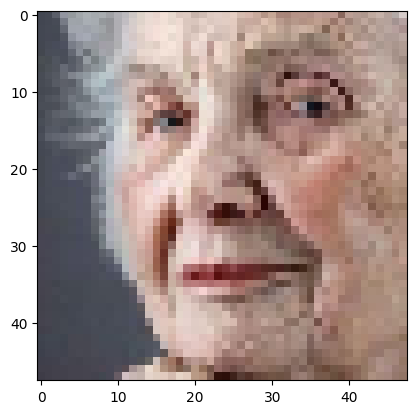

In [6]:
plt.imshow(images[4 

In [7]:
print(ages[4]) 

100


In [8]:
print(genders[4])       # 1 is female and 0 is male

1


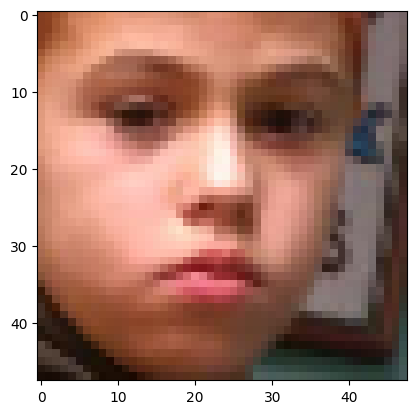

In [9]:
plt.imshow(images[63])

In [10]:
print(ages[63]) , print(genders[63])

10
0


(None, None)

In [11]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [12]:
np.save(fldr+'image.npy', images_f)
np.save(fldr+'age.npy', ages_f)
np.save(fldr+'gender.npy', genders_f)

# Finding no. of elements in dataset


In [13]:
values, count = np.unique(genders_f, return_counts =True)
print(count)

[12391 11317]


12391 are no. of males, 11317 females

In [14]:
# finding no. of samples in each age
values, count = np.unique(ages_f, return_counts =True)
print(count)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


<function matplotlib.pyplot.show(close=None, block=None)>

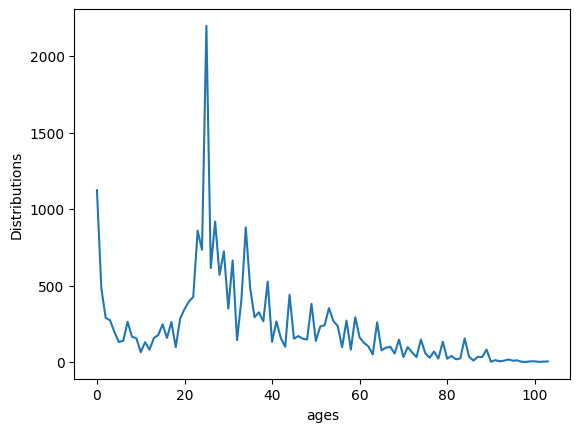

In [15]:
plt.plot(count)
plt.xlabel('ages')
plt.ylabel('Distributions')
plt.show

In [16]:
labels =[]
i=0
while i<len(ages):
    label =[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)      # labels are appended to labels resulting into list of lists containing age and gender pair.
    i=i+1

In [17]:
images_f_2 = images_f/255   # downscaling to 0-1

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

23708 is total images, 48x48 dimensions, 3 denotes RGB

In [19]:
labels_f = np.array(labels)

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2,labels_f, test_size=0.25)

In [22]:
y_train[0:5]

array([[12,  1],
       [35,  0],
       [26,  1],
       [45,  0],
       [25,  1]])

In [23]:
# Splitting y_train and y_test further
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [24]:
y_train_2[0][0:5]

array([1, 0, 1, 0, 1])

it is showing genders in above y_train[0:5]

In [25]:
y_train_2[1][0:5]

array([12, 35, 26, 45, 25])

it is showing ages in above y_train[0:5]

# Now  building the model

In [26]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters,
               kernel_size=(3, 3),
               padding="same",      #  The type of padding to be applied. "same" padding means the input and output dimensions will be the same.
               strides=(1, 1),
               kernel_regularizer=l2(0.001))(input_tensor)  #  L2 regularization applied to the convolutional kernel to prevent overfitting.
    x = Dropout(0.1)(x)        # This line adds a dropout layer, which helps prevent overfitting by randomly setting a fraction (here, 10%) of input units to zero during training.
    x = Activation('relu')(x)
    return x


In [27]:
from tensorflow.keras.layers import Flatten

In [28]:
def model(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPool2D(pool_size=(2, 2))(conv_4)

    flatten_layer = Flatten()(maxp_4)

    dense_1 = Dense(64, activation='relu')(flatten_layer)
    dense_2 = Dense(64, activation='relu')(flatten_layer)

    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)

    model = Model(inputs=inputs, outputs=[output_1, output_2])

    model.compile(loss=["binary_crossentropy", "mae"], optimizer=Adam(), metrics=["accuracy"],run_eagerly=True)

    return model


In [29]:
Model = model((48,48,3))

In [30]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
fle_s = 'Age_Sex_detection.h5'
checkpoint = ModelCheckpoint(fle_s, 
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,  # Save only the best model based on the monitored metric
                             save_weights_only=False,
                             mode='auto',
                             save_freq='epoch')  # Save at the end of each epoch

Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,
                                              monitor='val_loss',
                                              restore_best_weights=True)

callback_list = [checkpoint, Early_stop]


In [33]:
History = Model.fit(x_train,y_train_2, batch_size=64, validation_data=(x_test,y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250

278/278 [==============================] - ETA: 0s - loss: 16.6575 - sex_out_loss: 0.6930 - age_out_loss: 15.7892 - sex_out_accuracy: 0.5391 - age_out_accuracy: 0.0470
Epoch 1: val_loss improved from inf to 15.96941, saving model to Age_Sex_detection.h5
278/278 [==============================] - 70s 250ms/step - loss: 16.6575 - sex_out_loss: 0.6930 - age_out_loss: 15.7892 - sex_out_accuracy: 0.5391 - age_out_accuracy: 0.0470 - val_loss: 15.9694 - val_sex_out_loss: 0.6597 - val_age_out_loss: 15.1498 - val_sex_out_accuracy: 0.6610 - val_age_out_accuracy: 0.0481
Epoch 2/250


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 13.2477 - sex_out_loss: 0.5917 - age_out_loss: 12.4679 - sex_out_accuracy: 0.6885 - age_out_accuracy: 0.0459
Epoch 2: val_loss improved from 15.96941 to 11.55031, saving model to Age_Sex_detection.h5
278/278 [==============================] - 69s 249ms/step - loss: 13.2477 - sex_out_loss: 0.5917 - age_out_loss: 12.4679 - sex_out_accuracy: 0.6885 - age_out_accuracy: 0.0459 - val_loss: 11.5503 - val_sex_out_loss: 0.5330 - val_age_out_loss: 10.7992 - val_sex_out_accuracy: 0.7442 - val_age_out_accuracy: 0.0481
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 10.8123 - sex_out_loss: 0.5252 - age_out_loss: 10.0440 - sex_out_accuracy: 0.7361 - age_out_accuracy: 0.0456
Epoch 3: val_loss did not improve from 11.55031
278/278 [==============================] - 68s 245ms/step - loss: 10.8123 - sex_out_loss: 0.5252 - age_out_loss: 10.0440 - sex_out_accuracy: 0.7361 - age_out_accuracy: 0.0456 - val_loss: 13.4746 - val_

Epoch 17/250
278/278 [==============================] - ETA: 0s - loss: 7.1160 - sex_out_loss: 0.2878 - age_out_loss: 6.3197 - sex_out_accuracy: 0.8723 - age_out_accuracy: 0.0471
Epoch 17: val_loss did not improve from 8.17168
278/278 [==============================] - 68s 244ms/step - loss: 7.1160 - sex_out_loss: 0.2878 - age_out_loss: 6.3197 - sex_out_accuracy: 0.8723 - age_out_accuracy: 0.0471 - val_loss: 8.3028 - val_sex_out_loss: 0.2841 - val_age_out_loss: 7.5028 - val_sex_out_accuracy: 0.8637 - val_age_out_accuracy: 0.0481
Epoch 18/250
278/278 [==============================] - ETA: 0s - loss: 7.0002 - sex_out_loss: 0.2783 - age_out_loss: 6.1973 - sex_out_accuracy: 0.8790 - age_out_accuracy: 0.0471
Epoch 18: val_loss did not improve from 8.17168
278/278 [==============================] - 68s 244ms/step - loss: 7.0002 - sex_out_loss: 0.2783 - age_out_loss: 6.1973 - sex_out_accuracy: 0.8790 - age_out_accuracy: 0.0471 - val_loss: 8.6766 - val_sex_out_loss: 0.2713 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 6.2621 - sex_out_loss: 0.2406 - age_out_loss: 5.3119 - sex_out_accuracy: 0.8949 - age_out_accuracy: 0.0471
Epoch 32: val_loss did not improve from 7.70262
278/278 [==============================] - 65s 233ms/step - loss: 6.2621 - sex_out_loss: 0.2406 - age_out_loss: 5.3119 - sex_out_accuracy: 0.8949 - age_out_accuracy: 0.0471 - val_loss: 9.5901 - val_sex_out_loss: 0.2621 - val_age_out_loss: 8.6133 - val_sex_out_accuracy: 0.8821 - val_age_out_accuracy: 0.0481
Epoch 33/250
278/278 [==============================] - ETA: 0s - loss: 6.1228 - sex_out_loss: 0.2386 - age_out_loss: 5.1640 - sex_out_accuracy: 0.8968 - age_out_accuracy: 0.0471
Epoch 33: val_loss did not improve from 7.70262
278/278 [==============================] - 65s 234ms/step - loss: 6.1228 - sex_out_loss: 0.2386 - age_out_loss: 5.1640 - sex_out_accuracy: 0.8968 - age_out_accuracy: 0.0471 - val_loss: 9.3470 - val_sex_out_loss: 0.2643 - val_age_out_loss: 8.3566 - val

278/278 [==============================] - 65s 234ms/step - loss: 5.9013 - sex_out_loss: 0.2184 - age_out_loss: 4.8406 - sex_out_accuracy: 0.9038 - age_out_accuracy: 0.0471 - val_loss: 7.8111 - val_sex_out_loss: 0.2726 - val_age_out_loss: 6.6922 - val_sex_out_accuracy: 0.8731 - val_age_out_accuracy: 0.0481
Epoch 48/250
278/278 [==============================] - ETA: 0s - loss: 5.8430 - sex_out_loss: 0.2113 - age_out_loss: 4.7818 - sex_out_accuracy: 0.9074 - age_out_accuracy: 0.0471
Epoch 48: val_loss did not improve from 7.70262
278/278 [==============================] - 65s 235ms/step - loss: 5.8430 - sex_out_loss: 0.2113 - age_out_loss: 4.7818 - sex_out_accuracy: 0.9074 - age_out_accuracy: 0.0471 - val_loss: 8.3933 - val_sex_out_loss: 0.2495 - val_age_out_loss: 7.2898 - val_sex_out_accuracy: 0.8905 - val_age_out_accuracy: 0.0481
Epoch 49/250
278/278 [==============================] - ETA: 0s - loss: 5.8487 - sex_out_loss: 0.2123 - age_out_loss: 4.7797 - sex_out_accuracy: 0.9054 - age

Epoch 63/250
278/278 [==============================] - ETA: 0s - loss: 5.5843 - sex_out_loss: 0.1985 - age_out_loss: 4.4559 - sex_out_accuracy: 0.9115 - age_out_accuracy: 0.0470
Epoch 63: val_loss did not improve from 7.69540
278/278 [==============================] - 65s 233ms/step - loss: 5.5843 - sex_out_loss: 0.1985 - age_out_loss: 4.4559 - sex_out_accuracy: 0.9115 - age_out_accuracy: 0.0470 - val_loss: 8.2962 - val_sex_out_loss: 0.2506 - val_age_out_loss: 7.1138 - val_sex_out_accuracy: 0.8878 - val_age_out_accuracy: 0.0481
Epoch 64/250
278/278 [==============================] - ETA: 0s - loss: 5.5829 - sex_out_loss: 0.1952 - age_out_loss: 4.4528 - sex_out_accuracy: 0.9121 - age_out_accuracy: 0.0466
Epoch 64: val_loss did not improve from 7.69540
278/278 [==============================] - 65s 233ms/step - loss: 5.5829 - sex_out_loss: 0.1952 - age_out_loss: 4.4528 - sex_out_accuracy: 0.9121 - age_out_accuracy: 0.0466 - val_loss: 7.7438 - val_sex_out_loss: 0.2622 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 5.5525 - sex_out_loss: 0.1953 - age_out_loss: 4.3730 - sex_out_accuracy: 0.9113 - age_out_accuracy: 0.0461
Epoch 78: val_loss did not improve from 7.69540
278/278 [==============================] - 74s 266ms/step - loss: 5.5525 - sex_out_loss: 0.1953 - age_out_loss: 4.3730 - sex_out_accuracy: 0.9113 - age_out_accuracy: 0.0461 - val_loss: 8.3061 - val_sex_out_loss: 0.2559 - val_age_out_loss: 7.0652 - val_sex_out_accuracy: 0.8893 - val_age_out_accuracy: 0.0481
Epoch 79/250
278/278 [==============================] - ETA: 0s - loss: 5.5418 - sex_out_loss: 0.1918 - age_out_loss: 4.3631 - sex_out_accuracy: 0.9123 - age_out_accuracy: 0.0464
Epoch 79: val_loss did not improve from 7.69540
278/278 [==============================] - 74s 267ms/step - loss: 5.5418 - sex_out_loss: 0.1918 - age_out_loss: 4.3631 - sex_out_accuracy: 0.9123 - age_out_accuracy: 0.0464 - val_loss: 8.0855 - val_sex_out_loss: 0.2553 - val_age_out_loss: 6.8411 - val

278/278 [==============================] - 74s 265ms/step - loss: 5.4287 - sex_out_loss: 0.1873 - age_out_loss: 4.2222 - sex_out_accuracy: 0.9186 - age_out_accuracy: 0.0458 - val_loss: 8.4004 - val_sex_out_loss: 0.2641 - val_age_out_loss: 7.1159 - val_sex_out_accuracy: 0.8851 - val_age_out_accuracy: 0.0481
Epoch 94/250
278/278 [==============================] - ETA: 0s - loss: 5.3651 - sex_out_loss: 0.1850 - age_out_loss: 4.1589 - sex_out_accuracy: 0.9188 - age_out_accuracy: 0.0462
Epoch 94: val_loss did not improve from 7.69540
278/278 [==============================] - 74s 266ms/step - loss: 5.3651 - sex_out_loss: 0.1850 - age_out_loss: 4.1589 - sex_out_accuracy: 0.9188 - age_out_accuracy: 0.0462 - val_loss: 9.1452 - val_sex_out_loss: 0.2640 - val_age_out_loss: 7.8596 - val_sex_out_accuracy: 0.8912 - val_age_out_accuracy: 0.0481
Epoch 95/250
278/278 [==============================] - ETA: 0s - loss: 5.4552 - sex_out_loss: 0.1813 - age_out_loss: 4.2517 - sex_out_accuracy: 0.9237 - age

Epoch 109/250
278/278 [==============================] - ETA: 0s - loss: 5.3951 - sex_out_loss: 0.1778 - age_out_loss: 4.1760 - sex_out_accuracy: 0.9226 - age_out_accuracy: 0.0453
Epoch 109: val_loss did not improve from 7.69540
278/278 [==============================] - 77s 277ms/step - loss: 5.3951 - sex_out_loss: 0.1778 - age_out_loss: 4.1760 - sex_out_accuracy: 0.9226 - age_out_accuracy: 0.0453 - val_loss: 7.8162 - val_sex_out_loss: 0.2638 - val_age_out_loss: 6.5101 - val_sex_out_accuracy: 0.8854 - val_age_out_accuracy: 0.0481
Epoch 110/250
278/278 [==============================] - ETA: 0s - loss: 5.4162 - sex_out_loss: 0.1758 - age_out_loss: 4.1972 - sex_out_accuracy: 0.9270 - age_out_accuracy: 0.0454
Epoch 110: val_loss did not improve from 7.69540
278/278 [==============================] - 74s 267ms/step - loss: 5.4162 - sex_out_loss: 0.1758 - age_out_loss: 4.1972 - sex_out_accuracy: 0.9270 - age_out_accuracy: 0.0454 - val_loss: 8.3935 - val_sex_out_loss: 0.2699 - val_age_out_l

278/278 [==============================] - ETA: 0s - loss: 5.3370 - sex_out_loss: 0.1695 - age_out_loss: 4.1067 - sex_out_accuracy: 0.9264 - age_out_accuracy: 0.0445
Epoch 124: val_loss did not improve from 7.69540
278/278 [==============================] - 73s 263ms/step - loss: 5.3370 - sex_out_loss: 0.1695 - age_out_loss: 4.1067 - sex_out_accuracy: 0.9264 - age_out_accuracy: 0.0445 - val_loss: 7.8968 - val_sex_out_loss: 0.2669 - val_age_out_loss: 6.5681 - val_sex_out_accuracy: 0.8903 - val_age_out_accuracy: 0.0481
Epoch 125/250
278/278 [==============================] - ETA: 0s - loss: 5.2916 - sex_out_loss: 0.1676 - age_out_loss: 4.0618 - sex_out_accuracy: 0.9300 - age_out_accuracy: 0.0452
Epoch 125: val_loss did not improve from 7.69540
278/278 [==============================] - 74s 264ms/step - loss: 5.2916 - sex_out_loss: 0.1676 - age_out_loss: 4.0618 - sex_out_accuracy: 0.9300 - age_out_accuracy: 0.0452 - val_loss: 7.7203 - val_sex_out_loss: 0.2733 - val_age_out_loss: 6.3838 - 

In [34]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 8s 44ms/step - loss: 7.6954 - sex_out_loss: 0.2445 - age_out_loss: 6.5267 - sex_out_accuracy: 0.8917 - age_out_accuracy: 0.0481


[7.69539737701416,
 0.24451923370361328,
 6.526656150817871,
 0.8916821479797363,
 0.048085033893585205]

In [37]:
pred= Model.predict(x_test)
pred[1]

186/186 [==============================] - 4s 22ms/step


array([[ 8.559766],
       [35.452225],
       [17.39685 ],
       ...,
       [35.4013  ],
       [27.412079],
       [25.49057 ]], dtype=float32)

# Plotting the results

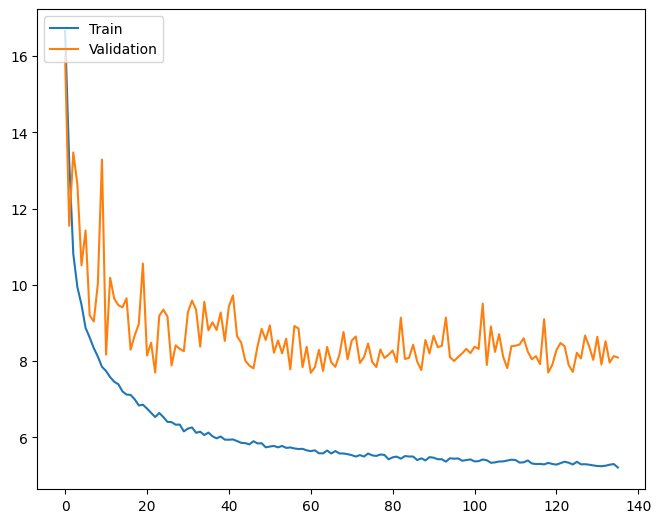

In [38]:
# Plotting Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.xlabel=('epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

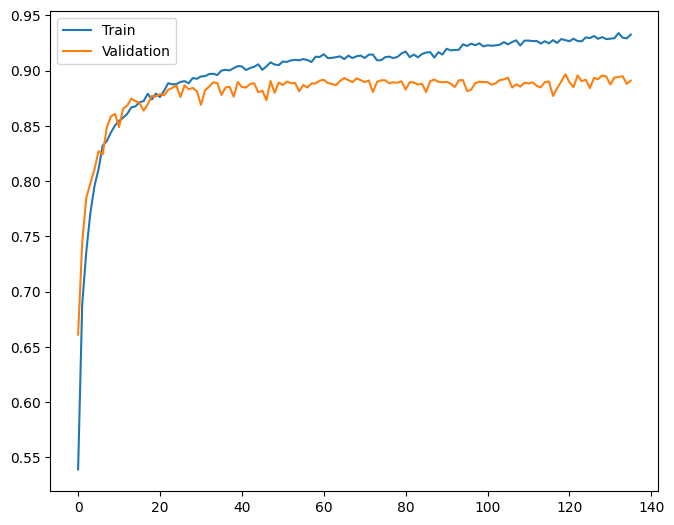

In [39]:
# Plotting sex accuracy
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.xlabel=('epoch')
plt.ylabel=('accuracy')
plt.title=('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

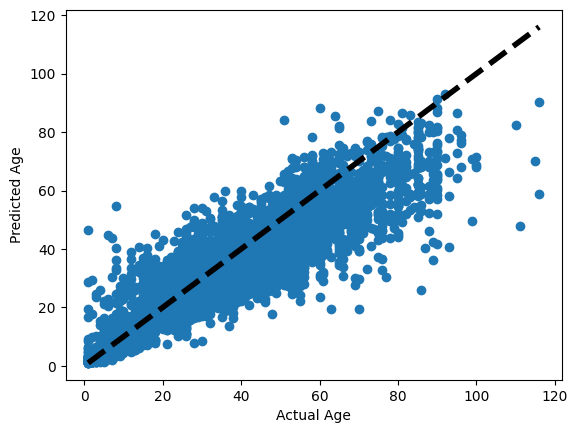

In [40]:
# plotting age accuracy
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [41]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\HP\AppData\Local\Temp\ipykernel_23728\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
report = classification_report(y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      3105
           1       0.87      0.91      0.89      2822

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [46]:
results = confusion_matrix(y_test_2[0],Pred_l)

<Axes: >

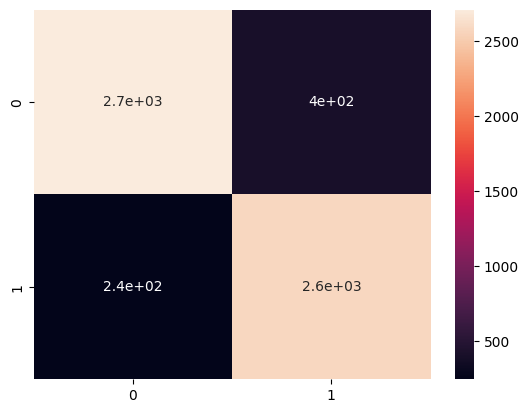

In [47]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [48]:
def test_image(ind, images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f = ['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted age is : " +str(age))
    print("Predicted gender is :" + sex_f[sex])

1/1 [==============================] - 0s 53ms/step
Predicted age is : 79
Predicted gender is :Female


C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


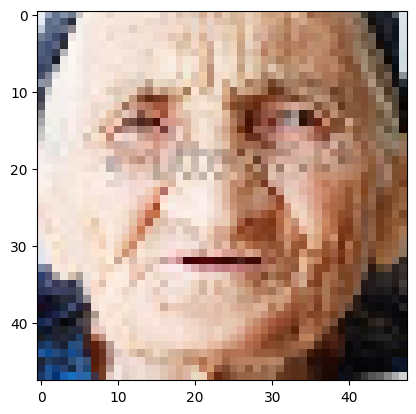

In [59]:
test_image(2,images_f,images_f_2,Model)

1/1 [==============================] - 0s 52ms/step
Predicted age is : 9
Predicted gender is :Male


C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


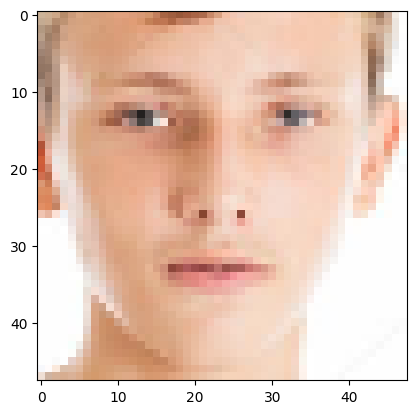

In [60]:
test_image(25,images_f,images_f_2,Model)

1/1 [==============================] - 0s 51ms/step
Predicted age is : 11
Predicted gender is :Female


C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


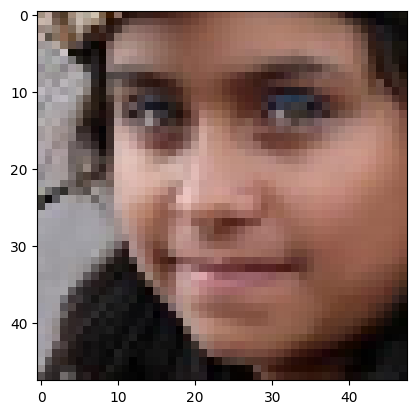

In [61]:
test_image(462,images_f,images_f_2,Model)

1/1 [==============================] - 0s 47ms/step
Predicted age is : 24
Predicted gender is :Female


C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_23728\1278539027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


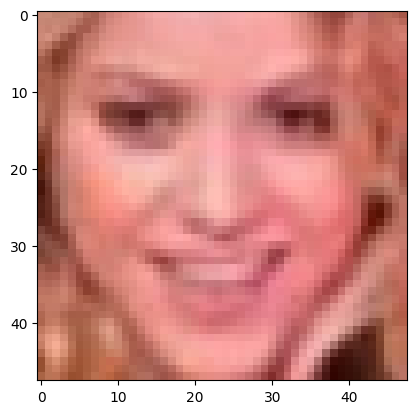

In [62]:
test_image(4412,images_f,images_f_2,Model)